# NumPy Polynomial Fit

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Load Data

In [2]:
data = np.load('polynomial_sample.npy')

## EDA - Exploratory Data Analysis

In [3]:
data.shape

(2, 50)

In [4]:
x = data[0, :]
y = data[1, :]

### Plot

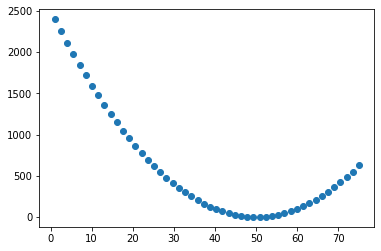

In [5]:
plt.scatter(x, y)
plt.show()

## Regression Fit

### Full Data

In [6]:
poly_1 = np.polyfit(x, y, 1)
poly_2 = np.polyfit(x, y, 2)

poly_1, poly_2

(array([ -24.        , 1530.95918367]), array([ 1.0e+00, -1.0e+02,  2.5e+03]))

In [7]:
poly_1 = np.poly1d(poly_1)
poly_2 = np.poly1d(poly_2)

poly_1.c, poly_2.c

(array([ -24.        , 1530.95918367]), array([ 1.0e+00, -1.0e+02,  2.5e+03]))

In [8]:
poly_1(60), poly_2(60)

(90.95918367346962, 100.0)

In [9]:
poly_1(37), poly_2(37)

(642.9591836734695, 169.0)

In [10]:
yhat_1 = poly_1(x)
yhat_2 = poly_2(x)

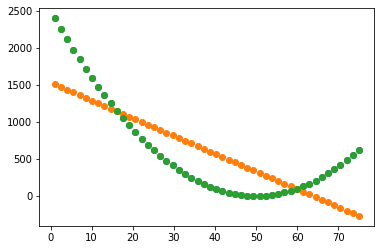

In [11]:
plt.scatter(x, y)

plt.scatter(x, yhat_1)
plt.scatter(x, yhat_2)

plt.show()

#### Residuals

##### TSS

In [12]:
tss = np.power(y - y.mean(), 2).sum()
tss

22691441.06418244

##### RSS

In [13]:
rss1, rss2 = np.power(y - yhat_1, 2).sum(), np.power(y - yhat_2, 2).sum()
rss1, rss2

(9012616.574386522, 1.3219318007054123e-24)

##### MSE

In [14]:
np.power(y - yhat_1, 2).mean(), np.power(y - yhat_2, 2).mean()

(180252.33148773044, 2.6438636014108245e-26)

##### R2

In [15]:
1-rss1/tss, 1-rss2/tss

(0.6028186773641016, 1.0)

### Train-Test Split

In [16]:
train_test_ratio = 0.80

In [17]:
train_cnt = round(train_test_ratio * x.shape[0])
train_cnt

40

#### By Index

In [18]:
train_x, test_x = x[:train_cnt], x[train_cnt:]
train_y, test_y = y[:train_cnt], y[train_cnt:]

In [19]:
poly_1 = np.polyfit(train_x, train_y, 1)
poly_2 = np.polyfit(train_x, train_y, 2)

In [20]:
poly_1 = np.poly1d(poly_1)
poly_2 = np.poly1d(poly_2)

In [21]:
test_yhat_1 = poly_1(test_x)
test_yhat_2 = poly_2(test_x)

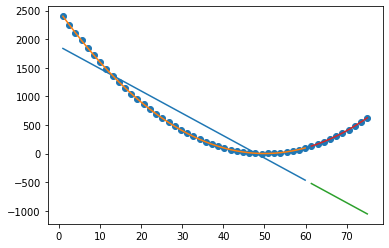

In [22]:
plt.scatter(x, y)

plt.plot(train_x, poly_1(train_x))
plt.plot(train_x, poly_2(train_x))

plt.plot(test_x, test_yhat_1)
plt.plot(test_x, test_yhat_2)

plt.show()

In [23]:
# MSE
np.power(test_y - test_yhat_1, 2).mean(), np.power(test_y - test_yhat_2, 2).mean()

(1407975.8210583138, 1.5683069764192644e-23)

#### Random Sampling v1

In [24]:
np.random.seed(42)
train_ids = np.random.choice(range(x.shape[0]), size=train_cnt, replace=False)

test_ids = np.setdiff1d(range(x.shape[0]), train_ids)

train_ids, test_ids

(array([13, 39, 30, 45, 17, 48, 26, 25, 32, 19, 12,  4, 37,  8,  3,  6, 41,
        46, 47, 15,  9, 16, 24, 34, 31,  0, 44, 27, 33,  5, 29, 11, 36,  1,
        21,  2, 43, 35, 23, 40]),
 array([ 7, 10, 14, 18, 20, 22, 28, 38, 42, 49]))

In [25]:
train_x, train_y = x[train_ids], y[train_ids]
test_x, test_y = x[test_ids], y[test_ids]

In [26]:
poly_1 = np.polyfit(train_x, train_y, 1)
poly_2 = np.polyfit(train_x, train_y, 2)

In [27]:
poly_1 = np.poly1d(poly_1)
poly_2 = np.poly1d(poly_2)

In [28]:
test_yhat_1 = poly_1(test_x)
test_yhat_2 = poly_2(test_x)

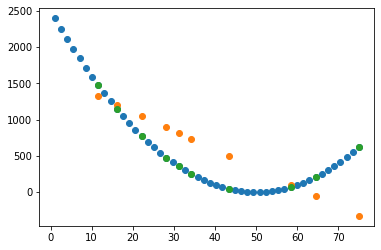

In [29]:
plt.scatter(x, y)

# plt.scatter(train_x, poly_1(train_x))
# plt.scatter(train_x, poly_2(train_x))

plt.scatter(test_x, test_yhat_1)
plt.scatter(test_x, test_yhat_2)

plt.show()

In [30]:
np.power(test_y - test_yhat_1, 2).mean(), np.power(test_y - test_yhat_2, 2).mean()

(190675.03987694386, 1.5203331262202812e-24)

#### Random Sampling v2

In [31]:
np.random.seed(42)
train_array = np.random.choice([0, 1],
                               size=x.shape[0],
                               p=[train_test_ratio, 1-train_test_ratio])
train_array

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0])

In [32]:
train_ids = np.arange(x.shape[0])[train_array == 0]
test_ids = np.arange(x.shape[0])[train_array == 1]
train_ids, test_ids

(array([ 0,  2,  3,  4,  5,  6,  8,  9, 10, 13, 14, 15, 16, 17, 18, 19, 20,
        21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 36, 37, 38, 39, 40,
        41, 42, 44, 45, 46, 47, 48, 49]),
 array([ 1,  7, 11, 12, 33, 34, 35, 43]))

In [33]:
train_x, train_y = x[train_ids], y[train_ids]
test_x, test_y = x[test_ids], y[test_ids]

In [34]:
train_x.shape, test_x.shape

((42,), (8,))

In [35]:
poly_1 = np.polyfit(train_x, train_y, 1)
poly_2 = np.polyfit(train_x, train_y, 2)

In [36]:
poly_1 = np.poly1d(poly_1)
poly_2 = np.poly1d(poly_2)

In [37]:
test_yhat_1 = poly_1(test_x)
test_yhat_2 = poly_2(test_x)

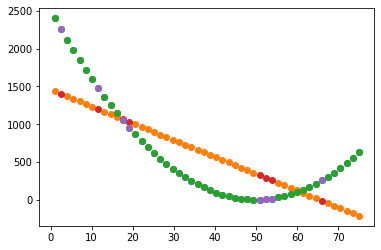

In [38]:
plt.scatter(x, y)

plt.scatter(train_x, poly_1(train_x))
plt.scatter(train_x, poly_2(train_x))

plt.scatter(test_x, test_yhat_1)
plt.scatter(test_x, test_yhat_2)

plt.show()

In [39]:
# MSE
np.power(test_y - test_yhat_1, 2).mean(), np.power(test_y - test_yhat_2, 2).mean()

(140973.08078511184, 2.791416459206438e-24)

## New Functions

### [np.polyfit()](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html)
`np.polyfit()`


### [np.poly1d()](https://numpy.org/doc/stable/reference/generated/numpy.poly1d.html)
`np.poly1d()`

### [np.random.choice()](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html)
`np.random.choice()`

### [np.setdiff1d()](https://numpy.org/doc/stable/reference/generated/numpy.setdiff1d.html)
`np.setdiff1d()`

## Exercises

### Linear Regression
Without using `np.polyfit()` and `np.poly1d()` for simple linear regression (first order polynomial) manually calculate:
- $\hat{\beta}_1 = \frac{\sum(X_i – \bar{X}) (Y_i – \bar{Y})} {\sum(X_i – \bar{X})^2}$
- $\hat{\beta}_0 = \bar{Y} – \hat{\beta}_1 \bar{X}$

after calculating $\beta$ coefficients, then calculate $\hat{y} = \hat{\beta}_1 \times x + \hat{\beta}_0$ and with produced results, calculate:
- Residual Sum of Squares (RSS)
- Total Sum of Squares (TSS)
- $R^2$

In [40]:
x_mean = x.mean()
y_mean = y.mean()

#### Beta_1

In [41]:
beta_1 = sum((x - x_mean) * (y - y_mean))/ sum((x - x_mean) ** 2)
beta_1

-24.000000000000004

#### Beta_0

In [42]:
beta_0 = y_mean - beta_1 * x_mean
beta_0

1530.9591836734694

#### Y_hat

In [43]:
yhat = beta_1 * x + beta_0

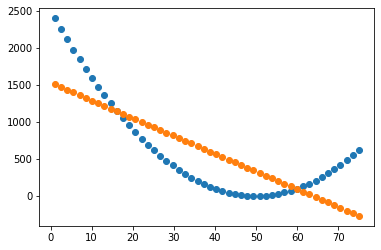

In [44]:
plt.scatter(x, y)

plt.scatter(x, yhat)

plt.show()

#### RSS, TSS

In [45]:
rss = np.power(y - yhat, 2).sum()
tss = np.power(y - y_mean, 2).sum()
rss, tss

(9012616.574386522, 22691441.06418244)

#### R-Squared

In [46]:
r_squared = 1 - rss / tss
r_squared

0.6028186773641016

In [47]:
np.corrcoef(x, y)

array([[ 1.        , -0.77641399],
       [-0.77641399,  1.        ]])

In [48]:
np.corrcoef(x, y)[0, 1] ** 2

0.6028186773641008

### Linear Plot
for produced results build linear plot with scattered dots.

hint: to draw line on the plane two dots are necessary

In [49]:
x_dots = np.array([x.min(), x.max()])
yhat_dots = beta_1 * x_dots + beta_0

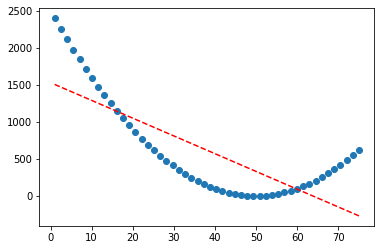

In [50]:
plt.scatter(x, y)

plt.plot(x_dots, yhat_dots, 'r--')

plt.show()

## DRY - Don't Repeat Yourself

In [51]:
def reg_model(x, y, deg=1):
    reg_poly = np.polyfit(x, y, deg)
    reg_poly = np.poly1d(reg_poly)
    return reg_poly

poly_1 = reg_model(x, y)
poly_2 = reg_model(x, y, 2)

yhat_1 = poly_1(x)

## Matrix Version

Do It Yourself

$\beta = (X^TX)^{-1}(X^Ty)$